In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [41]:
df_index=pd.read_csv('economic_index.csv')

In [43]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [45]:
##drop unceesary colums
df_index.drop(columns=["Unnamed: 0", "year", "month"], inplace=True, errors='ignore')


In [47]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [51]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

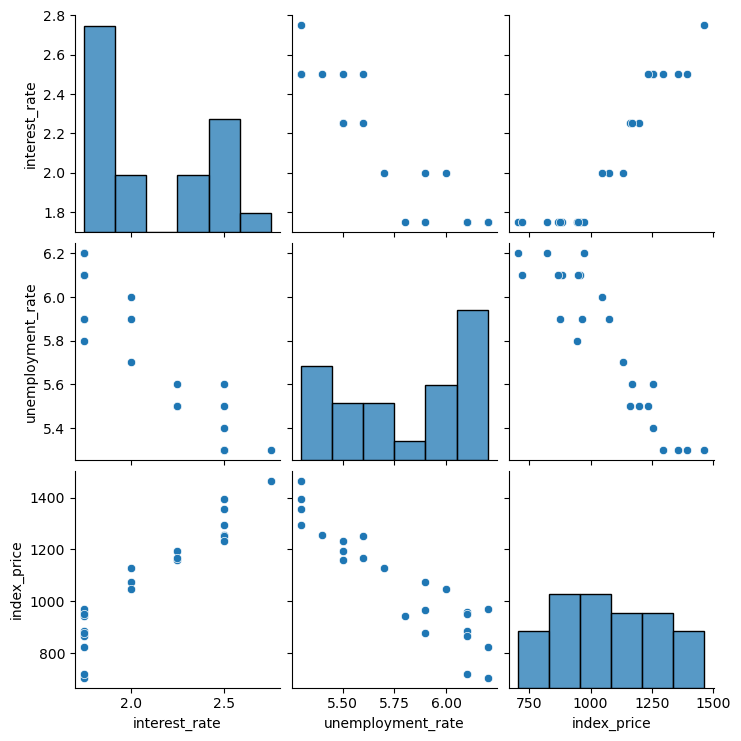

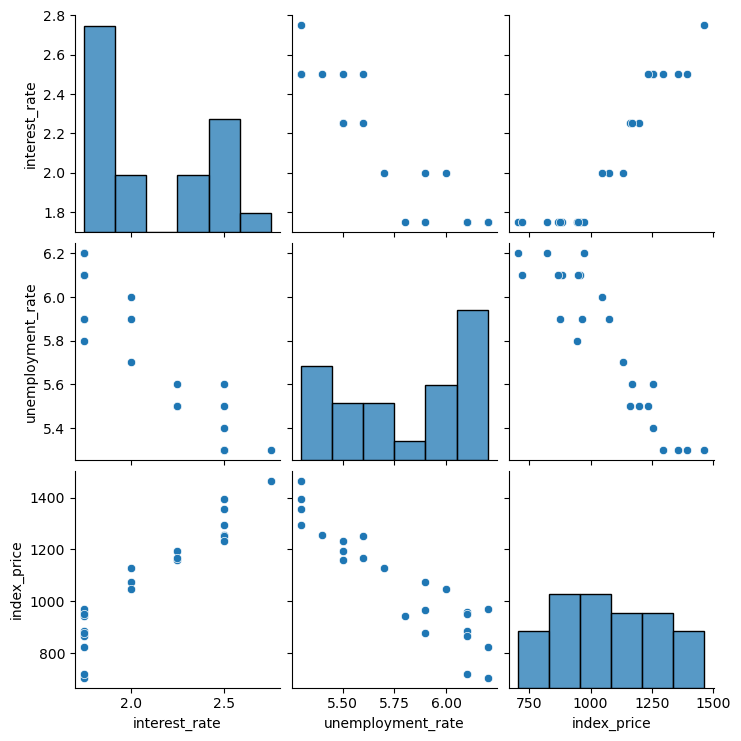

In [57]:
## lets do visual lization
import seaborn as sns
sns.pairplot(df_index)
plt.show()

In [61]:
df_index.corr()
"""Strong negative — when interest_rate goes up, unemployment_rate usually goes down.
"""

'Strong negative — when interest_rate goes up, unemployment_rate usually goes down.\n'

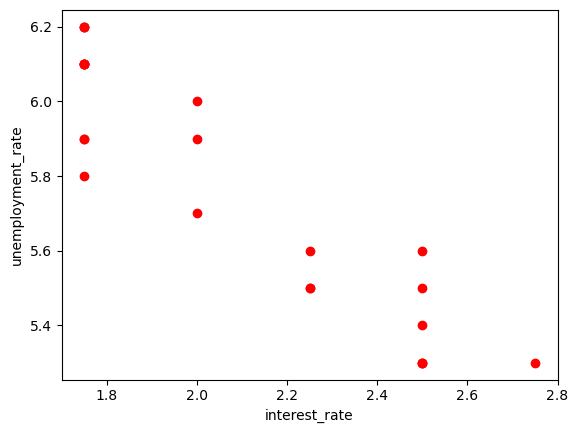

In [75]:
## visualize the datapoints more closely 
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()


In [77]:
##indepent and depenedent featreus
X=df_index.iloc[:,:-1] ## :-1 means all columns except the last one.
Y=df_index.iloc[:,-1]


In [79]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [153]:
Y


0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [87]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [95]:
import seaborn as sns

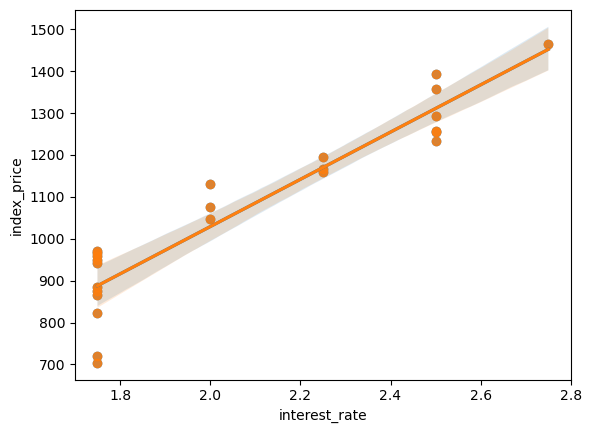

In [101]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

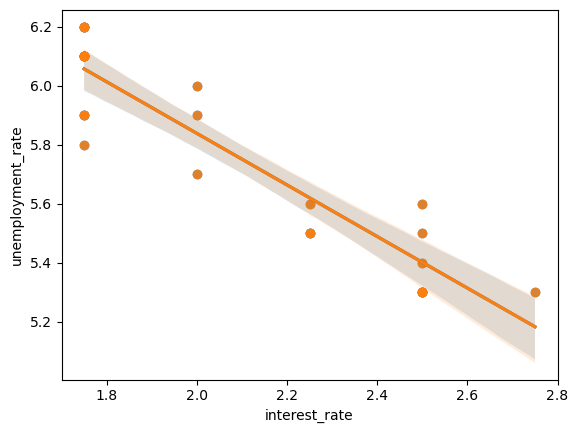

In [105]:
sns.regplot(x='interest_rate',y='unemployment_rate',data=df_index) ##It creates a scatter plot + regression line in one graph.
plt.show()

In [107]:
from sklearn.preprocessing import StandardScaler

In [113]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [162]:
X_test


array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ],
       [2.25, 5.6 ]])

In [119]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [125]:
regression.fit(X_train,y_train)

LinearRegression()

In [137]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(validation_score)

"""Normally, we split data into train and test, but that might not give a reliable score — it depends on how the data was split.

Cross-validation solves this problem by:

Splitting your training data into several folds (default = 5).

Training and testing your model multiple times on different parts of the data.

Then averaging all those results.

This gives a more accurate estimate of how your model performs on unseen data.

i wil getting the 5 cv
"""

[-1861.74046551 -8715.8459466  -7707.52362191 -9169.13776461
  -791.32842311]


'Normally, we split data into train and test, but that might not give a reliable score — it depends on how the data was split.\n\nCross-validation solves this problem by:\n\nSplitting your training data into several folds (default = 5).\n\nTraining and testing your model multiple times on different parts of the data.\n\nThen averaging all those results.\n\nThis gives a more accurate estimate of how your model performs on unseen data.\n\ni wil getting the 5 cv\n'

In [135]:
np.mean(validation_score)

-5649.115244350756

In [145]:
## predication
y_pred=regression.predict(X_test)

In [147]:
y_pred

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

In [151]:
## performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

316313.1524014579
549.3922441707886
562.4172404909525


In [155]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
print(1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

-8.395998348460044
-14.659997247433404


Assumptions

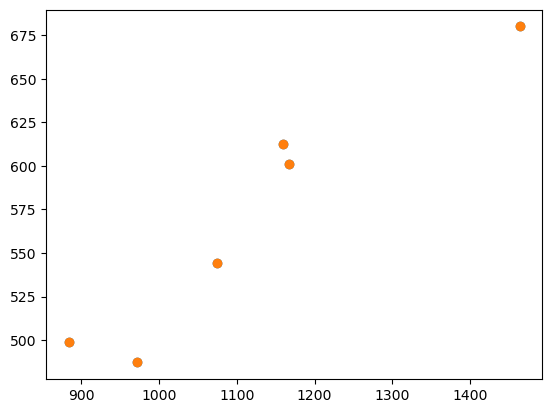

In [160]:
plt.scatter(y_test,y_pred)
plt.show()

In [164]:
residuals=y_test-y_pred
print(residuals)

8     546.356240
16    483.872630
0     783.968431
18    385.246914
11    530.927293
9     565.981956
Name: index_price, dtype: float64


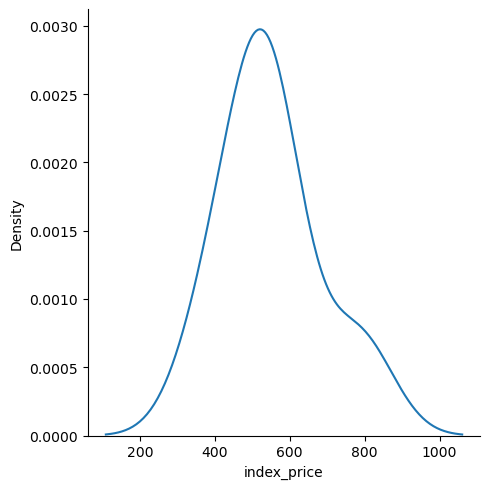

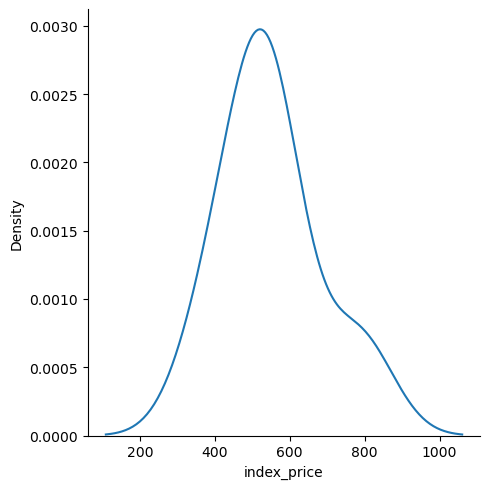

In [168]:
sns.displot(residuals,kind='kde')
plt.show()

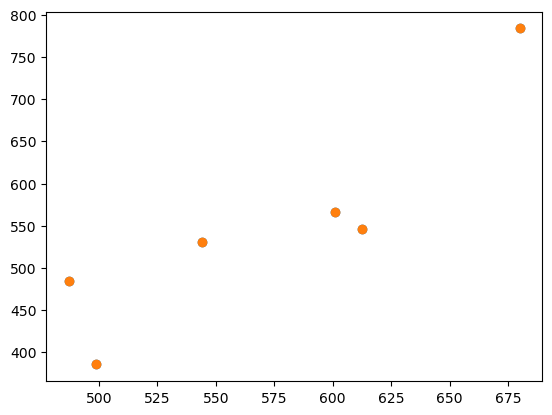

In [172]:
##scatter plot with respect to predication 
plt.scatter(y_pred,residuals)
plt.show()

In [ ]:
## ols linear regression
